<a href="https://colab.research.google.com/github/1012357482/ConsumoAguaSeriesTemporales/blob/developer/ConsumoAguaSeriesTemporales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto predicción del consumo del agua**




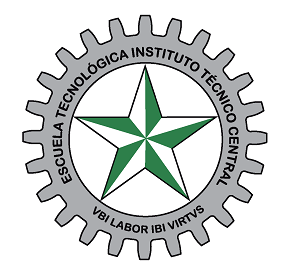


#Escuela Tecnólogica Instituto Técnico Central

##*Facultad Ingenieria de Sistemas**

###*Electiva Técnica IV, Ciencia de datos*

### Profesor: Elías Buitrago

### Alumnos: Ferrixon Matiz, Camilo Reyes.


#1. Entendimiento del negocio

Para entender realmente el conjunto de datos, se estudiará el significado y la relevancia de cada variable con respecto al problema. Se buscará responder a diversas cuestiones sobre ellas, como:

*  Entendimiento de los datos.
*  La relevancia de las variables.

Para el conjunto de datos [Cardiovascular Disease dataset](https://www.superservicios.gov.co/sites/default/files/inline-files/Consumos-Historicos-de-Agua-Potable-2014-2021.xlsx), se buscará la predicción de consumo de agua para la ciudad de bogota en el año 2022.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/Consumo_de_agua_potable_en_el_casco_urbano_primer_semestre.csv', sep=',')

In [ ]:
dataset.head()

,Tipo,ESTRATO,CONSUMO ENERO,CONSUMO FEBRERO,CONSUMO MARZO,CONSUMO ABRIL,CONSUMO MAYO,CONSUMO JUNIO,PROMEDIO,AÑO
0,RESIDENCIAL,ESTRATO 1,180,220,230,330,260,300,2.533333e+16,2020
1,RESIDENCIAL,ESTRATO 2 .,0,0,0,0,0,0,0.000000e+00,2020
2,RESIDENCIAL,ESTRATO 2 .,180,240,290,290,220,320,2.566667e+16,2020
3,RESIDENCIAL,ESTRATO 2,180,130,180,280,240,200,2.016667e+16,2020
4,RESIDENCIAL,ESTRATO 2 .,510,320,300,360,330,350,3.616667e+16,2020


Se elimina la columna id del conjunto de datos.

In [ ]:
#dataini = dataset
# axis=1 --> elimina columnas
#dataini = dataini.drop(['Tipo', ], axis=1)

## 1.1 Análisis exploratorio de datos.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6944 entries, 0 to 6943
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   6943 non-null   object
 1   Unnamed: 1   6943 non-null   object
 2   Unnamed: 2   6943 non-null   object
 3   Unnamed: 3   6943 non-null   object
 4   Unnamed: 4   6943 non-null   object
 5   Unnamed: 5   6943 non-null   object
 6   Unnamed: 6   6805 non-null   object
 7   Unnamed: 7   6533 non-null   object
 8   Unnamed: 8   5700 non-null   object
 9   Unnamed: 9   3222 non-null   object
 10  Unnamed: 10  1502 non-null   object
 11  Unnamed: 11  1024 non-null   object
 12  Unnamed: 12  5415 non-null   object
 13  Unnamed: 13  6016 non-null   object
 14  Unnamed: 14  5323 non-null   object
 15  Unnamed: 15  3030 non-null   object
 16  Unnamed: 16  1151 non-null   object
 17  Unnamed: 17  925 non-null    object
dtypes: object(18)
memory usage: 976.6+ KB


In [ ]:
dataset['AÑO'].unique()

array([2020, 2021])

Debido a la insuficiencia de datos se cambia el enfoque.

In [ ]:
dataset_general=pd.read_csv('/content/drive/MyDrive/Consumos-Historicos-de-Agua-Potable-2014-2021.csv', sep=';')

In [ ]:
dataset_general.head()

,IDENTIFICADOR EMPRESA,EMPRESA,AÑO,CÓDIGO DANE,DEPARTAMENTO,MUNICIPIO,1T,2T,3T,4T,5T,6T,1P,2P,3P,4P,5P,6P
0,980,MUNICIPIO DE PUERTO NARIÑO,2014,91540,AMAZONAS,PUERTO NARINO,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,76,OFICINA DE SERVICIOS PÚBLICOS DE MONTEBELLO,2014,5467,ANTIOQUIA,MONTEBELLO,9.377,21.342,28.045,NaN,NaN,NaN,"10,75","9,52","9,32",NaN,NaN,NaN
2,77,EMPRESAS PUBLICAS MUNICIPALES DE PUERTO NARE E...,2014,5585,ANTIOQUIA,PUERTO NARE,227.554,393.354,59.762,NaN,NaN,NaN,"15,17","15,93","14,80",NaN,NaN,NaN
3,91,EMPRESA DE SERVICIOS PUBLICOS LA UNION S.A E.S.P.,2014,5400,ANTIOQUIA,LA UNION,41.721,314.515,111.779,4.155,NaN,NaN,"13,56","11,15","11,37","28,85",NaN,NaN
4,96,EMPRESA DE SERVICIOS PÚBLICOS DE EL CARMEN DE ...,2014,5148,ANTIOQUIA,EL CARMEN DE VIBORAL,13.849,369.051,608.558,1.417,NaN,NaN,"12,91","10,96","9,76","4,70",NaN,NaN


### 1.1.2 Se filtra el dataset para la ciudad  de Bógota D.C.

In [ ]:
dataset_general['MUNICIPIO'].unique()

array(['PUERTO NARINO', 'MONTEBELLO', 'PUERTO NARE', 'LA UNION',
       'EL CARMEN DE VIBORAL', 'MEDELLIN', 'BARBOSA', 'BELLO', 'CALDAS',
       'COPACABANA', 'ENVIGADO', 'GIRARDOTA', 'ITAGUI', 'LA ESTRELLA',
       'SABANETA', 'CAMPAMENTO', 'URRAO', 'ANZA', 'GUARNE', 'FRONTINO',
       'PENOL', 'ALEJANDRIA', 'BELMIRA', 'GUATAPE', 'ABEJORRAL',
       'SAN VICENTE', 'CONCEPCION', 'CONCORDIA', 'LA CEJA', 'NECOCLI',
       'SAN PEDRO DE URABA', 'AMALFI', 'ANORI', 'ARBOLETES', 'ARMENIA',
       'PUERTO TRIUNFO', 'SAN JOSE DE LA MONTANA', 'SAN PEDRO',
       'SANTA ROSA DE OSOS', 'TITIRIBI', 'VENECIA', 'ANDES',
       'CIUDAD BOLIVAR', 'JARDIN', 'SEGOVIA', 'RIONEGRO', 'CAROLINA',
       'PUERTO BERRIO', 'FREDONIA', 'SANTA BARBARA', 'ZARAGOZA',
       'EL SANTUARIO', 'YOLOMBO', 'GOMEZ PLATA', 'MARINILLA', 'GRANADA',
       'COCORNA', 'CAICEDO', 'YONDO', 'RETIRO', 'TOLEDO', 'SANTO DOMINGO',
       'ENTRERRIOS', 'OLAYA', 'NARINO', 'SALGAR', 'ANGELOPOLIS',
       'SAN CARLOS', 'EBEJICO', 'CACER

In [ ]:
in_bogota= dataset_general['MUNICIPIO'] == "BOGOTA, D.C."
in_bogota

0       False
1       False
2       False
3       False
4       False
        ...  
6937    False
6938    False
6939    False
6940    False
6941    False
Name: MUNICIPIO, Length: 6942, dtype: bool

In [ ]:
dataset_bogota=dataset_general[in_bogota]
dataset_bogota

,IDENTIFICADOR EMPRESA,EMPRESA,AÑO,CÓDIGO DANE,DEPARTAMENTO,MUNICIPIO,1T,2T,3T,4T,5T,6T,1P,2P,3P,4P,5P,6P
143,70,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2014,11001,"BOGOTA, D.C.","BOGOTA, D.C.",15.103.158,72.106.197,69.500.747,30.159.467,11.087.023,10.703.104,"23,72","21,53","19,33","19,19","21,87","26,01"
1016,70,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2015,11001,"BOGOTA, D.C.","BOGOTA, D.C.",15.294.156,72.872.505,69.476.632,30.000.490,11.116.290,10.538.900,"23,58","21,37","19,00","18,70","21,00","25,15"
1891,70,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2016,11001,"BOGOTA, D.C.","BOGOTA, D.C.",14.376.680,70.093.859,65.173.133,28.571.218,10.206.408,9.576.765,"21,93","20,25","17,83","17,53","19,46","23,53"
2149,70,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2016,25004,CUNDINAMARCA,"BOGOTA, D.C.",308,1.706,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2771,70,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2017,11001,"BOGOTA, D.C.","BOGOTA, D.C.",20.181.940,97.882.542,94.689.530,38.648.802,14.349.529,13.761.187,"21,59","20,77","18,39","17,83","19,52","22,98"
3601,70,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2018,11001,"BOGOTA, D.C.","BOGOTA, D.C.",15.723.513,79.567.237,76.058.201,30.983.396,11.285.651,10.503.659,"21,99","21,10","18,29","17,66","19,47","22,87"
4330,70,EMPRESA DE ACUEDUCTO Y ALCANTARILLADO DE BOGOT...,2019,11001,"BOGOTÁ, D.C.","BOGOTA, D.C.",16.654.516,79.416.240,75.798.664,31.699.349,11.524.868,10.557.076,"10,83","10,59","9,10","8,76","9,62","11,20"
4331,1922,ASOCIACION DE SERVICIOS PÚBLICOS COMUNITARIOS ...,2019,11001,"BOGOTÁ, D.C.","BOGOTA, D.C.",895,281.130,3.455,1.209,12.534,2.077,"12,43","10,31","14,40","11,19","11,61","10,82"
4332,22636,COJARDIN SA ESP,2019,11001,"BOGOTÁ, D.C.","BOGOTA, D.C.",NaN,NaN,NaN,56.784,15.459,250.025,NaN,NaN,NaN,"31,04","8,46","8,75"
5116,70,EMPRESA DE ACUEDUCTO Y ALCANTARILLADO DE BOGOT...,2020,11001,"BOGOTA, D.C.","BOGOTA, D.C.",17.139.759,81.614.514,78.006.097,32.782.875,11.915.894,11.031.496,"10,94","10,69","8,92","8,57",NaN,"9,92"


In [ ]:
dataset_bogota.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 143 to 6094
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   IDENTIFICADOR EMPRESA  16 non-null     int64 
 1   EMPRESA                16 non-null     object
 2   AÑO                    16 non-null     int64 
 3   CÓDIGO DANE            16 non-null     int64 
 4   DEPARTAMENTO           16 non-null     object
 5   MUNICIPIO              16 non-null     object
 6   1T                     13 non-null     object
 7   2T                     13 non-null     object
 8   3T                     14 non-null     object
 9   4T                     14 non-null     object
 10  5T                     14 non-null     object
 11  6T                     14 non-null     object
 12  1P                     11 non-null     object
 13  2P                     12 non-null     object
 14  3P                     12 non-null     object
 15  4P                   

### 1.1.3 Se eliminan columnas que se consideran innecesarias.

In [ ]:
dataini = dataset_bogota
# axis=1 --> elimina columnas
dataini = dataini.drop(['IDENTIFICADOR EMPRESA','CÓDIGO DANE','DEPARTAMENTO','MUNICIPIO','1P','2P','3P','4P','5P','6P' ], axis=1)
dataset_bogota=dataini
dataset_bogota

,EMPRESA,AÑO,1T,2T,3T,4T,5T,6T
143,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2014,15.103.158,72.106.197,69.500.747,30.159.467,11.087.023,10.703.104
1016,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2015,15.294.156,72.872.505,69.476.632,30.000.490,11.116.290,10.538.900
1891,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2016,14.376.680,70.093.859,65.173.133,28.571.218,10.206.408,9.576.765
2149,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2016,308,1.706,0,NaN,NaN,NaN
2771,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2017,20.181.940,97.882.542,94.689.530,38.648.802,14.349.529,13.761.187
3601,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2018,15.723.513,79.567.237,76.058.201,30.983.396,11.285.651,10.503.659
4330,EMPRESA DE ACUEDUCTO Y ALCANTARILLADO DE BOGOT...,2019,16.654.516,79.416.240,75.798.664,31.699.349,11.524.868,10.557.076
4331,ASOCIACION DE SERVICIOS PÚBLICOS COMUNITARIOS ...,2019,895,281.130,3.455,1.209,12.534,2.077
4332,COJARDIN SA ESP,2019,NaN,NaN,NaN,56.784,15.459,250.025
5116,EMPRESA DE ACUEDUCTO Y ALCANTARILLADO DE BOGOT...,2020,17.139.759,81.614.514,78.006.097,32.782.875,11.915.894,11.031.496


In [ ]:
dataset_bogota

,EMPRESA,AÑO,1T,2T,3T,4T,5T,6T
143,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2014,15103158.0,72106197.0,69500747.0,30159467.0,11087023.0,10703104.0
1016,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2015,15294156.0,72872505.0,69476632.0,30000490.0,11116290.0,10538900.0
1891,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2016,14376680.0,70093859.0,65173133.0,28571218.0,10206408.0,9576765.0
2149,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2016,308.0,1706.0,0.0,NaN,NaN,NaN
2771,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2017,20181940.0,97882542.0,94689530.0,38648802.0,14349529.0,13761187.0
3601,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2018,15723513.0,79567237.0,76058201.0,30983396.0,11285651.0,10503659.0
4330,EMPRESA DE ACUEDUCTO Y ALCANTARILLADO DE BOGOT...,2019,16654516.0,79416240.0,75798664.0,31699349.0,11524868.0,10557076.0
4331,ASOCIACION DE SERVICIOS PÚBLICOS COMUNITARIOS ...,2019,895.0,281130.0,3455.0,1209.0,12534.0,2077.0
4332,COJARDIN SA ESP,2019,NaN,NaN,NaN,56784.0,15459.0,250025.0
5116,EMPRESA DE ACUEDUCTO Y ALCANTARILLADO DE BOGOT...,2020,17139759.0,81614514.0,78006097.0,32782875.0,11915894.0,11031496.0


In [ ]:
dataset_bogota.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 143 to 6094
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   EMPRESA  16 non-null     object
 1   AÑO      16 non-null     int64 
 2   1T       13 non-null     object
 3   2T       13 non-null     object
 4   3T       14 non-null     object
 5   4T       14 non-null     object
 6   5T       14 non-null     object
 7   6T       14 non-null     object
dtypes: int64(1), object(7)
memory usage: 1.1+ KB


### 1.1.4 Verificamos datos faltantes

In [ ]:
dataset_bogota.isnull()

,EMPRESA,AÑO,1T,2T,3T,4T,5T,6T
143,False,False,False,False,False,False,False,False
1016,False,False,False,False,False,False,False,False
1891,False,False,False,False,False,False,False,False
2149,False,False,False,False,False,True,True,True
2771,False,False,False,False,False,False,False,False
3601,False,False,False,False,False,False,False,False
4330,False,False,False,False,False,False,False,False
4331,False,False,False,False,False,False,False,False
4332,False,False,True,True,True,False,False,False
5116,False,False,False,False,False,False,False,False


In [ ]:
dataframe_bogota= pd.DataFrame(dataset_bogota)

Contamos los datos faltantes por columna.

In [ ]:
dataframe_bogota.isnull().sum(min_count=1)
#dataframe_bogota.isnull().sum().sum()

EMPRESA    0
AÑO        0
1T         3
2T         3
3T         2
4T         2
5T         2
6T         2
dtype: int64

### 1.1.5 Tratamiento de los nan
El tratamiento de los datos faltantes en por el valor de la media por columna

In [ ]:
#dataframe_bogota['1T'] = [str(x).replace('.','') for x in dataframe_bogota['1T']]
#dataframe_bogota['2T'] = [str(x).replace('.','') for x in dataframe_bogota['2T']]
#dataframe_bogota['3T'] = [str(x).replace('.','') for x in dataframe_bogota['3T']]
#dataframe_bogota['4T'] = [str(x).replace('.','') for x in dataframe_bogota['4T']]
#dataframe_bogota['5T'] = [str(x).replace('.','') for x in dataframe_bogota['5T']]
#dataframe_bogota['6T'] = [str(x).replace('.','') for x in dataframe_bogota['6T']]
#dataframe_bogota['1T'] = [str(x).replace('nan','NaN') for x in dataframe_bogota['1T']]
#dataframe_bogota['2T'] = [str(x).replace('nan','NaN') for x in dataframe_bogota['2T']]
#dataframe_bogota['3T'] = [str(x).replace('nan','NaN') for x in dataframe_bogota['3T']]
#dataframe_bogota['4T'] = [str(x).replace('nan','NaN') for x in dataframe_bogota['4T']]
#dataframe_bogota['5T'] = [str(x).replace('nan','NaN') for x in dataframe_bogota['5T']]
#dataframe_bogota['6T'] = [str(x).replace('nan','NaN') for x in dataframe_bogota['6T']]
#dataframe_bogota
#
#dataframe_bogota['1T'] = dataframe_bogota['1T'].apply(lambda x: x.replace(".",""))

,EMPRESA,AÑO,1T,2T,3T,4T,5T,6T
143,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2014,15103158,72106197,69500747,30159467,11087023,10703104
1016,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2015,15294156,72872505,69476632,30000490,11116290,10538900
1891,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2016,14376680,70093859,65173133,28571218,10206408,9576765
2149,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2016,308,1706,0,NaN,NaN,NaN
2771,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2017,20181940,97882542,94689530,38648802,14349529,13761187
3601,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2018,15723513,79567237,76058201,30983396,11285651,10503659
4330,EMPRESA DE ACUEDUCTO Y ALCANTARILLADO DE BOGOT...,2019,16654516,79416240,75798664,31699349,11524868,10557076
4331,ASOCIACION DE SERVICIOS PÚBLICOS COMUNITARIOS ...,2019,895,281130,3455,1209,12534,2077
4332,COJARDIN SA ESP,2019,NaN,NaN,NaN,56784,15459,250025
5116,EMPRESA DE ACUEDUCTO Y ALCANTARILLADO DE BOGOT...,2020,17139759,81614514,78006097,32782875,11915894,11031496


In [ ]:
dataframe_bogota.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 143 to 6094
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   EMPRESA  16 non-null     object 
 1   AÑO      16 non-null     int64  
 2   1T       16 non-null     object 
 3   2T       16 non-null     object 
 4   3T       16 non-null     object 
 5   4T       16 non-null     object 
 6   5T       16 non-null     object 
 7   6T       14 non-null     float64
dtypes: float64(1), int64(1), object(6)
memory usage: 1.1+ KB


In [ ]:
#dataframe_bogota['6T'] = [str(x).replace('nan','NaN') for x in dataframe_bogota['6T']]

dataframe_bogota['1T'] = pd.to_numeric(dataframe_bogota['1T'], errors="coerce")
dataframe_bogota['2T'] = pd.to_numeric(dataframe_bogota['2T'], errors="coerce")
dataframe_bogota['3T'] = pd.to_numeric(dataframe_bogota['3T'], errors="coerce")
dataframe_bogota['4T'] = pd.to_numeric(dataframe_bogota['4T'], errors="coerce")
dataframe_bogota['5T'] = pd.to_numeric(dataframe_bogota['5T'], errors="coerce")
dataframe_bogota['6T'] = pd.to_numeric(dataframe_bogota['6T'], errors="coerce")
dataframe_bogota

,EMPRESA,AÑO,1T,2T,3T,4T,5T,6T
143,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2014,15103158.0,72106197.0,69500747.0,30159467.0,11087023.0,10703104.0
1016,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2015,15294156.0,72872505.0,69476632.0,30000490.0,11116290.0,10538900.0
1891,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2016,14376680.0,70093859.0,65173133.0,28571218.0,10206408.0,9576765.0
2149,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2016,308.0,1706.0,0.0,NaN,NaN,NaN
2771,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2017,20181940.0,97882542.0,94689530.0,38648802.0,14349529.0,13761187.0
3601,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2018,15723513.0,79567237.0,76058201.0,30983396.0,11285651.0,10503659.0
4330,EMPRESA DE ACUEDUCTO Y ALCANTARILLADO DE BOGOT...,2019,16654516.0,79416240.0,75798664.0,31699349.0,11524868.0,10557076.0
4331,ASOCIACION DE SERVICIOS PÚBLICOS COMUNITARIOS ...,2019,895.0,281130.0,3455.0,1209.0,12534.0,2077.0
4332,COJARDIN SA ESP,2019,NaN,NaN,NaN,56784.0,15459.0,250025.0
5116,EMPRESA DE ACUEDUCTO Y ALCANTARILLADO DE BOGOT...,2020,17139759.0,81614514.0,78006097.0,32782875.0,11915894.0,11031496.0


In [ ]:
from sklearn.impute import SimpleImputer
X=dataframe_bogota.iloc[:,:].values
imp= SimpleImputer(missing_values=np.nan, strategy='mean')
imp= imp.fit(X[:,2:8])
X[:,2:8]=imp.transform(X[:,2:8])
X

array([['EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE BOGOTÁ E.S.P',
        2014, 15103158.0, 72106197.0, 69500747.0, 30159467.0, 11087023.0,
        10703104.0],
       ['EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE BOGOTÁ E.S.P',
        2015, 15294156.0, 72872505.0, 69476632.0, 30000490.0, 11116290.0,
        10538900.0],
       ['EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE BOGOTÁ E.S.P',
        2016, 14376680.0, 70093859.0, 65173133.0, 28571218.0, 10206408.0,
        9576765.0],
       ['EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE BOGOTÁ E.S.P',
        2016, 308.0, 1706.0, 0.0, 16119351.42857143, 5896917.5,
        5576268.571428572],
       ['EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE BOGOTÁ E.S.P',
        2017, 20181940.0, 97882542.0, 94689530.0, 38648802.0, 14349529.0,
        13761187.0],
       ['EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE BOGOTÁ E.S.P',
        2018, 15723513.0, 79567237.0, 76058201.0, 30983396.0, 11285651.0,
        10503659.0],
       [

In [ ]:
df_bogota = pd.DataFrame(X,
                       columns=['Empresa', 'Año', '1T', '2T','3T','4T','5T','6T']
                         )
df_bogota

,Empresa,Año,1T,2T,3T,4T,5T,6T
0,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2014,15103158.0,72106197.0,69500747.0,30159467.0,11087023.0,10703104.0
1,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2015,15294156.0,72872505.0,69476632.0,30000490.0,11116290.0,10538900.0
2,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2016,14376680.0,70093859.0,65173133.0,28571218.0,10206408.0,9576765.0
3,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2016,308.0,1706.0,0.0,16119351.428571,5896917.5,5576268.571429
4,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2017,20181940.0,97882542.0,94689530.0,38648802.0,14349529.0,13761187.0
5,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",2018,15723513.0,79567237.0,76058201.0,30983396.0,11285651.0,10503659.0
6,EMPRESA DE ACUEDUCTO Y ALCANTARILLADO DE BOGOT...,2019,16654516.0,79416240.0,75798664.0,31699349.0,11524868.0,10557076.0
7,ASOCIACION DE SERVICIOS PÚBLICOS COMUNITARIOS ...,2019,895.0,281130.0,3455.0,1209.0,12534.0,2077.0
8,COJARDIN SA ESP,2019,8922801.538462,43160613.076923,38224348.0,56784.0,15459.0,250025.0
9,EMPRESA DE ACUEDUCTO Y ALCANTARILLADO DE BOGOT...,2020,17139759.0,81614514.0,78006097.0,32782875.0,11915894.0,11031496.0
